### 1.Import the dataset

In [22]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [3]:
pwd

'C:\\Users\\Selva Kumar E\\Desktop'

### 2.Read the dataset

In [4]:
df=pd.read_csv("Mall_Customers.csv")

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [7]:
df.shape

(200, 5)

In [8]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

### 3. Visualizations

#### 3.1 Univariate analysis

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

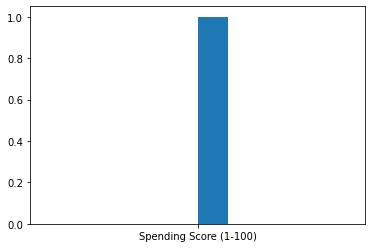

In [9]:
plt.hist('Spending Score (1-100)')

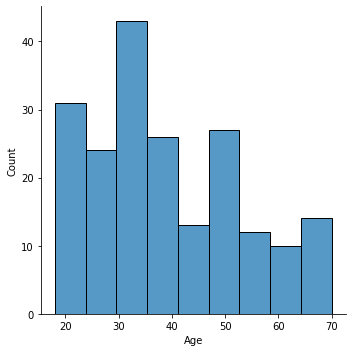

In [10]:
sns.displot(df["Age"])

#### 3.2. Bi-variate Analysis

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Gender'>

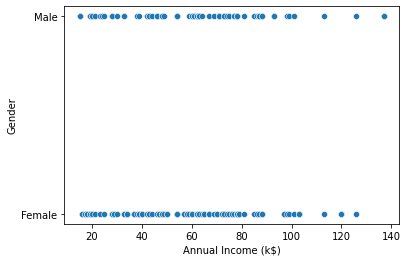

In [11]:
sns.scatterplot(df['Annual Income (k$)'],df['Gender'])

<AxesSubplot:>

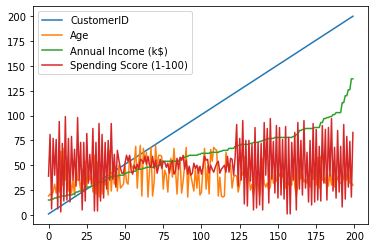

In [12]:
df.plot.line()

#### 3.3. Uni-variate Analysis

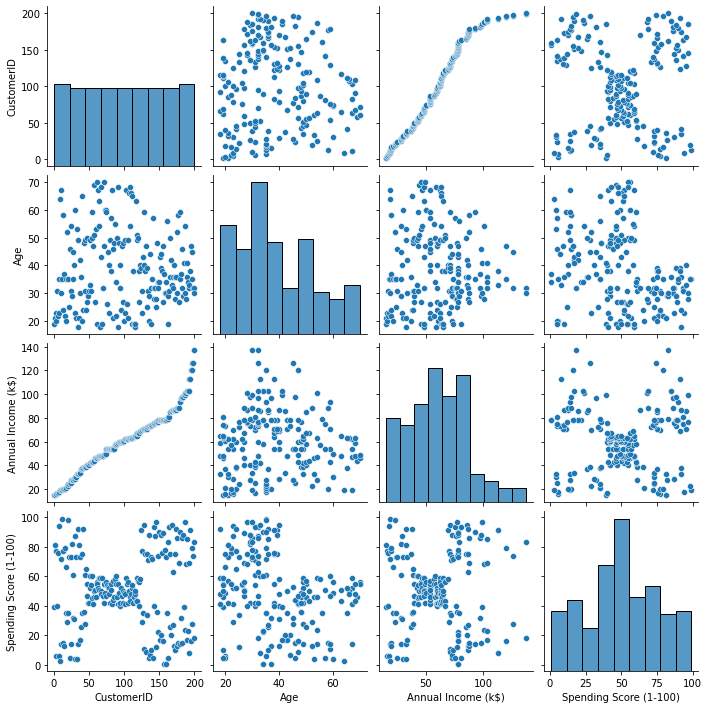

In [13]:
sns.pairplot(df)

### 4. Perform descriptive statistics on the dataset

In [14]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### 5. Check for Missing values and deal with them

In [15]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### 6. Find the outliers and replace them outliers

In [26]:
df["Annual Income (k$)"]=np.where(df["Annual Income (k$)"]>10,np.median,df["Annual Income (k$)"])
df["Annual Income (k$)"]

0      <function median at 0x0000027C3536D430>
1      <function median at 0x0000027C3536D430>
2      <function median at 0x0000027C3536D430>
3      <function median at 0x0000027C3536D430>
4      <function median at 0x0000027C3536D430>
                        ...                   
195    <function median at 0x0000027C3536D430>
196    <function median at 0x0000027C3536D430>
197    <function median at 0x0000027C3536D430>
198    <function median at 0x0000027C3536D430>
199    <function median at 0x0000027C3536D430>
Name: Annual Income (k$), Length: 200, dtype: object

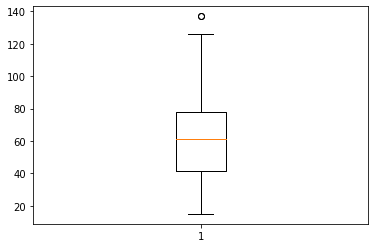

In [25]:
plt.boxplot(df['Annual Income (k$)'])
plt.show()

### 7. Check for Categorical columns and perform encoding

In [28]:
df["Gender"].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [29]:
df['Gender'].replace(['Male','Female'],[1,2],inplace=True)

### 8.Scaling the data

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### 9. Import the clustering algorithm

In [38]:
from sklearn.cluster import KMeans

### 11. Split the data into dependent and independent variables.

In [35]:
x=df.iloc[:,:-2].values

In [36]:
y=df.iloc[:,-1].values

### 12. Split the data into training and testing

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

### 13. Build the Model

In [39]:
kmeans = KMeans(n_clusters=3)


KMeans(n_clusters=3)

### 14. Train the Model

In [ ]:
kmeans.fit(x,y)

### 15. Test the Model

In [41]:
kmeans.predict(x_test)

array([0, 1, 2, 2, 1, 1, 0, 1, 0, 1, 0, 2, 1, 1, 2, 0, 0, 2, 0, 2, 1, 1,
       0, 1, 0, 2, 1, 1, 2, 0, 0, 0, 1, 2, 0, 1, 2, 0, 2, 2, 1, 2, 0, 2,
       1, 0, 0, 2, 2, 1])

### 16. Measure the performance using Evaluation Metrics.

In [47]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_score(x_test,kmeans.labels_, metric='euclidean')